In [25]:
import cv2  # OpenCVライブラリ
import matplotlib.pyplot as plt 
import numpy as np
import torch
import os

%matplotlib inline
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [26]:
from utils.ssd_model import SSD
ssd_cfg = {
    'num_classes': 21,  # 背景クラスを含めた合計クラス数
    'input_size': 300,  # 画像の入力サイズ
    'bbox_aspect_num': [4, 6, 6, 6, 4, 4],  # 出力するDBoxのアスペクト比の種類
    'feature_maps': [38, 19, 10, 5, 3, 1],  # 各sourceの画像サイズ
    'steps': [8, 16, 32, 64, 100, 300],  # DBOXの大きさを決める
    'min_sizes': [30, 60, 111, 162, 213, 264],  # DBOXの大きさを決める
    'max_sizes': [60, 111, 162, 213, 264, 315],  # DBOXの大きさを決める
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}

# SSDネットワークモデル
net = SSD(phase="inference", cfg=ssd_cfg)
net.eval()

# SSDの学習済みの重みを設定
net_weights = torch.load('./weights/2023-04-08-16-34/ssd300_200.pth',
                         map_location={'cuda:0': 'cpu'})

#net_weights = torch.load('./weights/ssd300_mAP_77.43_v2.pth',
#                         map_location={'cuda:0': 'cpu'})

net.load_state_dict(net_weights)

# GPUが使えるかを確認
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("使用GPU：", device)

print('SSD载入学习完毕的权重')

使用GPU： cuda:0
SSD载入学习完毕的权重


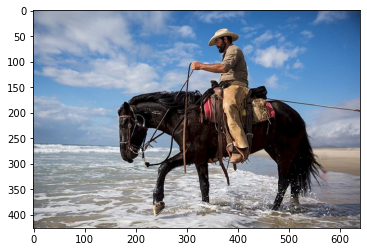

In [27]:
from utils.ssd_model import DataTransform

image_file_path = '../0_datasets/2_VOC2012/cowboy-757575_640.jpg'
img = cv2.imread(image_file_path)
height,width,channels = img.shape

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


In [28]:
color_mean = (104,117,123) # 颜色的平均值
input_size = 300
transform = DataTransform(input_size,color_mean)


phase = 'val'
img_transformed,boxes,labels = transform(img,phase,"","")
img = torch.from_numpy(img_transformed[:,:,(2,1,0)]).permute(2,0,1)

In [29]:
net.eval()
x = img.unsqueeze(0)
detections = net(x)

print(detections.shape)
print(detections)

torch.Size([1, 21, 200, 5])
tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],

         [[ 0.0338,  0.0159,  0.5794,  0.1065,  0.6453],
          [ 0.0132, -0.0072,  0.7837,  0.1795,  0.9114],
          [ 0.0112,  0.9241,  0.4053,  0.9976,  0.4825],
          ...,
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],

         [[ 0.0406,  0.7142,  0.7294,  0.8495,  0.9220],
          [ 0.0298,  0.7538,  0.8358,  0.8300,  0.9271],
          [ 0.0141,  0.3240,  0.8362,  0.4463,  0.9644],
          ...,
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [

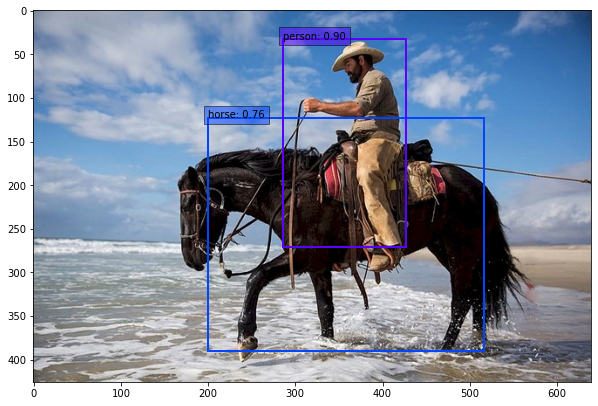

In [30]:
# 对图像进行预测
from utils.ssd_predict_show import SSDPredictShow

voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair',
               'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant',
               'sheep', 'sofa', 'train', 'tvmonitor']

ssd = SSDPredictShow(eval_categories=voc_classes,net=net)
ssd.show(image_file_path,data_confidence_level=0.6)